In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import math
import statistics

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


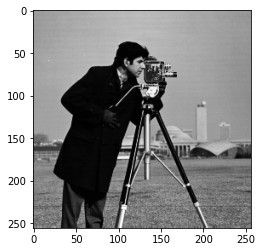

In [4]:
image = cv2.imread("/content/drive/MyDrive/cameraman.png", 0)
print(image)
plt.imshow(image, cmap='gray')

In [5]:
def wmf(copy, x, y, kernel, type_filter = "Median"): #use for both weighted median and FIR filter
  width = int((len(kernel)-1)/2)
  length = int((len(kernel[0])-1)/2)
  ls = []
  for s in range(len(kernel)):
    for t in range(len(kernel[0])):
      iter = kernel[s][t]
      j = s - width
      i = t - length
      
      if (type_filter == "FIR"):
        tmp_value = np.float32(copy[y+j][x+i])
        ls.append(tmp_value * iter)

      else:
        for k in range(iter):
          ls.append(copy[y+j][x+i])

  if (type_filter == "FIR"):
    ans = 0
    for tmp in ls:
      ans = ans + tmp
    ans = max(0, ans)
    ans = min(255, ans)
    ans = np.uint8(ans)
    
  else:      
    ans = statistics.median(ls)
  return ans

In [8]:
import numpy as np

[[159 156 157 ... 153 153 152]
 [155 158 157 ... 153 153 153]
 [159 156 157 ... 153 153 152]
 ...
 [126 124 123 ... 135 132 125]
 [123 126 130 ... 131 130 121]
 [123 126 130 ... 131 130 121]]


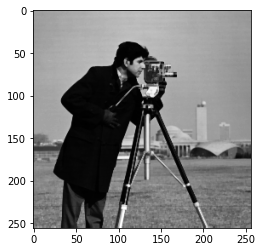

In [9]:
def unidirectional_median_filter_1(src, borderType=cv2.BORDER_DEFAULT, value=1, type=1):
   #Default_borderType is reflect
   kernel_1_1 = np.array([
    [0,0,0],
    [1,1,1],
    [0,0,0]
   ])
   kernel_1_2 = np.array([
    [0,1,0],
    [0,1,0],
    [0,1,0]
   ])
   if type == 2:
    kernel_1_1 = np.array([
      [1,0,0],
      [0,1,0],
      [0,0,1]
    ])
    kernel_1_2 = np.array([
      [0,0,1],
      [0,1,0],
      [1,0,0]
    ])
   width = int((len(kernel_1_1)-1)/2)
   length = int((len(kernel_1_1[0])-1)/2)
   top = width
   bottom = width
   left = length
   right = length
   tmp = np.copy(src)
   copy = cv2.copyMakeBorder(tmp, top, bottom, left, right, borderType, value)
   ans = np.copy(src)
   width_1 = len(copy)
   length_1 = len(copy[0])

   for y in range(width, width_1 - width):
     for x in range(length, length_1 - length):
      
       ans_1 = wmf(copy, x, y, kernel_1_1)
       ans_2 = wmf(copy, x, y, kernel_1_2)
       tmp_1 = np.float32(ans_1)
       tmp_2 = np.float32(ans_2)
       tmp_ans = (tmp_1 + tmp_2)//2
       tmp_ans = min(255, tmp_ans)
       ans[y - width][x - length] = np.uint8(tmp_ans)

   return ans 
   
img1 = unidirectional_median_filter_1(image)
print(img1)
plt.imshow(img1, cmap="gray")

In [10]:
type(image[0][0])

numpy.uint8

[[157 156 157 ... 154 153 153]
 [156 158 156 ... 152 152 152]
 [157 156 157 ... 154 153 153]
 ...
 [123 119 123 ... 130 128 127]
 [124 123 120 ... 133 130 128]
 [124 124 134 ... 124 127 125]]


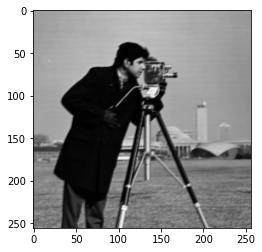

In [ ]:
def FIR_filter(src, kernel, borderType=cv2.BORDER_DEFAULT, value=1):
  #Default_borderType is reflect
   width = int((len(kernel)-1)/2)
   length = int((len(kernel[0])-1)/2)
   top = width
   bottom = width
   left = length
   right = length
   tmp = np.copy(src)
   copy = cv2.copyMakeBorder(tmp, top, bottom, left, right, borderType, value)
   ans = np.copy(src)
   width_1 = len(copy)
   length_1 = len(copy[0])
   for y in range(width, width_1 - width):
     for x in range(length, length_1 - length):
       ans[y - width][x - length] = wmf(copy, x, y, kernel, "FIR")
   return ans 

plt.imshow(image, cmap="gray")
h = np.array(
    [[1/(2*(1 + math.sqrt(2))), 1/(2 + math.sqrt(2)), 1/(2*(1 + math.sqrt(2)))],
    [1/(2 + math.sqrt(2)),0,1/(2 + math.sqrt(2))],
    [1/(2*(1 + math.sqrt(2))), 1/(2 + math.sqrt(2)), 1/(2*(1 + math.sqrt(2)))]
   ])
kernel_1_1 = np.array([
    [1,1,1],
    [1,0,0],
    [0,0,0]
   ])
img1 = FIR_filter(image, kernel_1_1 * h)
print(img1)
plt.imshow(img1, cmap="gray")

In [ ]:
def median_rational_hybrid_filter_use_FIR_filter(src, alpha, h=-1, k=-1,borderType=cv2.BORDER_DEFAULT, value=1):
   #Default_borderType is reflect
   kernel = np.array([
    [0,1,0],
    [1,3,1],
    [0,1,0]
   ])

   kernel_1_1 = np.array([
    [1,1,1],
    [1,0,0],
    [0,0,0]
   ])

   kernel_1_2 = np.array([
    [0,0,0],
    [0,0,1],
    [1,1,1]
   ])

   h_0 = np.array([
    [1/(2*(1 + math.sqrt(2))), 1/(2 + math.sqrt(2)), 1/(2*(1 + math.sqrt(2)))],
    [1/(2 + math.sqrt(2)),0,0],
    [0,0,0]
   ])

   h_1 = np.array([
    [0,0,0],
    [0,0, 1/(2 + math.sqrt(2))],
    [1/(2*(1 + math.sqrt(2))), 1/(2 + math.sqrt(2)), 1/(2*(1 + math.sqrt(2)))]
   ])
   kernel_1_1 = kernel_1_1 * h_0
   kernel_1_2 = kernel_1_2 * h_1
   width = int((len(kernel)-1)/2)
   length = int((len(kernel[0])-1)/2)
   top = width
   bottom = width
   left = length
   right = length
   tmp = np.copy(src)
   copy = cv2.copyMakeBorder(tmp, top, bottom, left, right, borderType, value)
   ans = np.copy(src)
   width_1 = len(copy)
   length_1 = len(copy[0])
   for y in range(width, width_1 - width):
     for x in range(length, length_1 - length):
       ans_2 = wmf(copy,x,y,kernel)
       ans_2 = np.float32(ans_2)

       ans_1 = wmf(copy, x, y, kernel_1_1, "FIR")
       ans_1 = np.float32(ans_1)

       ans_3 = wmf(copy, x, y, kernel_1_2, "FIR")
       ans_3 = np.float32(ans_3)

     if k == -1 or h == -1: # k or h is positive infinite
       ans[y - width][x - length] = np.uint8(ans_2) 
     else:
       tmp = ans_2 + (alpha[0]*ans_1 + alpha[1]*ans_2 + alpha[2]*ans_3)/(h + k *((ans_1 - ans_3)**2))
       tmp = max(0, tmp)
       tmp = min(255, tmp)
       ans[y - width][x - length] = np.uint8(tmp)
   return ans 

In [13]:
def median_rational_hybrid_filter_2(src, alpha , h=-1, k=-1,borderType=cv2.BORDER_DEFAULT, value=1): # use unidirectional median filter as phi1 and phi3
   #Default_borderType is reflect
   kernel = np.array([
    [0,1,0],
    [1,3,1],
    [0,1,0]
   ])
   kernel_1_1 = np.array([
    [0,0,0],
    [1,1,1],
    [0,0,0]
   ])
   kernel_1_2 = np.array([
    [0,1,0],
    [0,1,0],
    [0,1,0]
   ])
   kernel_3_1 = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
   ])
   kernel_3_2 = np.array([
    [0,0,1],
    [0,1,0],
    [1,0,0]
   ])
   width = int((len(kernel)-1)/2)
   length = int((len(kernel[0])-1)/2)
   top = width
   bottom = width
   left = length
   right = length
   tmp = np.copy(src)
   copy = cv2.copyMakeBorder(tmp, top, bottom, left, right, borderType, value)
   ans = np.copy(src)
   width_1 = len(copy)
   length_1 = len(copy[0])
   for y in range(width, width_1 - width):
     for x in range(length, length_1 - length):
       ans_2 = wmf(copy,x,y,kernel)
       ans_2 = np.float32(ans_2)

       ans_1_1 = wmf(copy, x, y, kernel_1_1)
       ans_1_2 = wmf(copy, x, y, kernel_1_2)
       tmp_1_1 = np.float32(ans_1_1)
       tmp_1_2 = np.float32(ans_1_2)
       tmp_ans_1 = (tmp_1_1 + tmp_1_2)//2
       ans_1 = tmp_ans_1

       ans_3_1 = wmf(copy, x, y, kernel_3_1)
       ans_3_2 = wmf(copy, x, y, kernel_3_2)
       tmp_3_1 = np.float32(ans_3_1)
       tmp_3_2 = np.float32(ans_3_2)
       tmp_ans_3 = (tmp_3_1 + tmp_3_2)//2
       ans_3 = tmp_ans_3

     if k == -1 or h == -1: # k or h is positive infinite
       ans[y - width][x - length] = np.uint8(ans_2) 
     else:
        tmp = ans_2 + (alpha[0]*ans_1 + alpha[1]*ans_2 + alpha[2]*ans_3)/(h + k *((ans_1 - ans_3)**2))
        tmp = min(tmp, 255) # in case it greater than 255 => unexpected value when converting into uint8
        tmp = max(tmp, 0) # in case it less than 0 => unexpected value when converting into uint8
        ans[y - width][x - length] = np.uint8(tmp)
   return ans 




In [70]:
def median_rational_hybrid_filter_3(src, alpha , h=-1, k=-1,borderType=cv2.BORDER_DEFAULT, value=1): # use bidirectional median filter as phi1 and phi3
   #Default_borderType is reflect
   kernel = np.array([
    [0,1,0],
    [1,3,1],
    [0,1,0]
   ])
   kernel_1 = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
   ])
   kernel_3 = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1]
   ])
   width = int((len(kernel)-1)/2)
   length = int((len(kernel[0])-1)/2)
   top = width
   bottom = width
   left = length
   right = length
   tmp = np.copy(src)
   copy = cv2.copyMakeBorder(tmp, top, bottom, left, right, borderType, value)
   ans = np.copy(src)
   width_1 = len(copy)
   length_1 = len(copy[0])
   for y in range(width, width_1 - width):
     for x in range(length, length_1 - length):
       
       tmp_2 = wmf(copy,x,y,kernel)
       ans_2 = np.float32(tmp_2)

       tmp_1 = wmf(copy, x, y, kernel_1)
       ans_1 = np.float32(tmp_1)

       tmp_3 = wmf(copy, x, y, kernel_3)
       ans_3 = np.float32(tmp_3)

     if k == -1 or h == -1: # k or h is positive infinite
       ans[y - width][x - length] = np.uint8(ans_2) 
     else:
        tmp = ans_2 + (alpha[0]*ans_1 + alpha[1]*ans_2 + alpha[2]*ans_3)/(h + k *((ans_1 - ans_3)**2))
        tmp = min(255, tmp)
        tmp = max(0, tmp)
        ans[y - width][x - length] = np.uint8(tmp)
   return ans 

47.57931665194174
[[169 148 112 ... 210  90 203]
 [135 211 126 ... 181 133 148]
 [ 98 189 184 ... 157 161 159]
 ...
 [ 86 128 135 ...  48  78  30]
 [ 97 184  41 ...  64  81 175]
 [ 93 182 111 ... 198 154  87]]


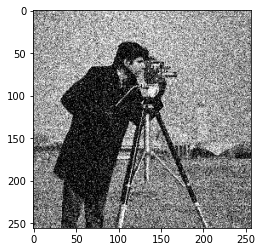

In [143]:
def gen_noisy_img(src, SNR, lbd):
  ans = np.copy(src)

  sum = 0
  width = len(ans)
  length = len(ans[0])
  size = width*length

  for y in range(width):
    for x in range(length):
      ins = np.float32(ans[y][x])
      sum = sum + ins*ins
   
  SNR = SNR/10.0  #from dB to B
  tmp = size*pow(10.0, SNR)
  tmp_var = sum/tmp
  var = tmp_var/(1 - lbd + 1.0/lbd)
  mean = 0
  stand = math.sqrt(var)

  noise_1 = np.random.normal(mean, stand, size=ans.shape)
  noise_2 = np.random.normal(mean, stand/lbd, size=ans.shape)
  
  noise = (1 - lbd)*noise_1 + lbd*noise_2

  print(stand)
  for y in range(width):
    for x in range(length):
      ins = ans[y][x]

      ins = np.float32(ins)
      ins = ins + noise[y][x]

      ins = min(255, ins)
      ins = max(0, ins)

      ans[y][x] = np.uint8(ins)
      
  return ans

corrupted = gen_noisy_img(image, 9, 1)
print(corrupted)
cv2.imwrite('/content/drive/MyDrive/Copy of cameraman.png', corrupted)
plt.imshow(corrupted, cmap="gray")


[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]
(256, 256)


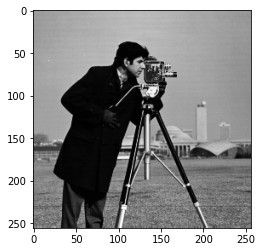

In [128]:
print(image)
print(image.shape)
plt.imshow(image, cmap="gray")

In [129]:
def MAE_criteria(src, corrupted):
  sum = 0
  width = len(src)
  length = len(src[0])
  for y in range(width):
    for x in range(length):
      tmp_src = np.float32(src[y][x])
      tmp_crt = np.float32(corrupted[y][x])
      ans = abs(tmp_src - tmp_crt)
      sum = sum + ans
  return sum/(width*length)

tmp = MAE_criteria(image, corrupted)
print(tmp)


34.428619384765625


In [130]:
def MSE_criteria(src, corrupted):
  sum = 0
  width = len(src)
  length = len(src[0])
  for y in range(width):
    for x in range(length):

      tmp_src = np.float32(src[y][x])
      tmp_crt = np.float32(corrupted[y][x])
      ans = tmp_src - tmp_crt
      sum = sum + ans*ans

  return sum/(width*length)


tmp = MSE_criteria(image, corrupted)
print(tmp)

1914.4176940917969


In [131]:
img1 = np.copy(corrupted)
img2 = np.copy(corrupted)
img3 = np.copy(corrupted)
alpha = [1, -2, 1]

In [132]:
img1_list = []
for i in range(100):
  img1 = median_rational_hybrid_filter_use_FIR_filter(img1, alpha, h = 15, k = 60)
  mse_1 = MSE_criteria(image, img1)
  mae_1 = MAE_criteria(image, img1)
  print("mse_1 = ", MSE_criteria(image, img1))
  print("mae_1 = ", MAE_criteria(image, img1))
  img1_list.append(mse_1)
  if (len(img1_list) > 0 and mse_1 > min(img1_list)):
    print(i)
    break

mse_1 =  1910.338394165039
mae_1 =  34.38706970214844
mse_1 =  1910.2424774169922
mae_1 =  34.38572692871094
mse_1 =  1910.1558074951172
mae_1 =  34.38441467285156
mse_1 =  1910.0792846679688
mae_1 =  34.383209228515625
mse_1 =  1910.0110168457031
mae_1 =  34.382049560546875
mse_1 =  1909.946304321289
mae_1 =  34.38087463378906
mse_1 =  1909.8762512207031
mae_1 =  34.3797607421875
mse_1 =  1909.818862915039
mae_1 =  34.37898254394531
mse_1 =  1909.7765350341797
mae_1 =  34.37855529785156
mse_1 =  1909.7330169677734
mae_1 =  34.37812805175781
mse_1 =  1909.6978454589844
mae_1 =  34.377655029296875
mse_1 =  1909.6681060791016
mae_1 =  34.37721252441406
mse_1 =  1909.6423950195312
mae_1 =  34.37689208984375
mse_1 =  1909.614990234375
mae_1 =  34.376495361328125
mse_1 =  1909.5936584472656
mae_1 =  34.376190185546875
mse_1 =  1909.5714569091797
mae_1 =  34.37590026855469
mse_1 =  1909.5509796142578
mae_1 =  34.37562561035156
mse_1 =  1909.5340728759766
mae_1 =  34.37538146972656
mse_1 =  1

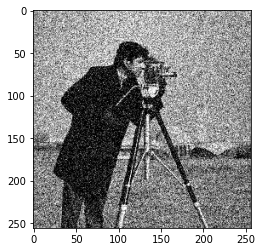

In [133]:
plt.imshow(img1, cmap="gray")

In [134]:
img2_list = []
for i in range(100):
  img2 = median_rational_hybrid_filter_2(img2, alpha, h = 15, k = 60)
  mse_2 = MSE_criteria(image, img2)
  mae_2 = MAE_criteria(image, img2)
  print("mse_2 = ", MSE_criteria(image, img2))
  print("mae_2 = ", MAE_criteria(image, img2))
  img2_list.append(mse_2)
  if (len(img2_list) > 0 and mse_2 > min(img2_list)):
    print(i)
    break

mse_2 =  1910.361328125
mae_2 =  34.387451171875
mse_2 =  1910.3006744384766
mae_2 =  34.38648986816406
mse_2 =  1910.2549896240234
mae_2 =  34.38575744628906
mse_2 =  1910.2143859863281
mae_2 =  34.38519287109375
mse_2 =  1910.1748809814453
mae_2 =  34.38456726074219
mse_2 =  1910.1395263671875
mae_2 =  34.384063720703125
mse_2 =  1910.1053619384766
mae_2 =  34.38362121582031
mse_2 =  1910.0755615234375
mae_2 =  34.38323974609375
mse_2 =  1910.0468444824219
mae_2 =  34.382904052734375
mse_2 =  1910.0191955566406
mae_2 =  34.382568359375
mse_2 =  1909.9849700927734
mae_2 =  34.38212585449219
mse_2 =  1909.9590911865234
mae_2 =  34.38175964355469
mse_2 =  1909.9330291748047
mae_2 =  34.38142395019531
mse_2 =  1909.9120788574219
mae_2 =  34.381103515625
mse_2 =  1909.8954010009766
mae_2 =  34.38084411621094
mse_2 =  1909.8829193115234
mae_2 =  34.38066101074219
mse_2 =  1909.868179321289
mae_2 =  34.38044738769531
mse_2 =  1909.8541259765625
mae_2 =  34.38018798828125
mse_2 =  1909.84049

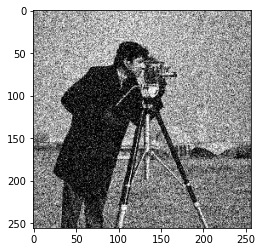

In [135]:
plt.imshow(img2, cmap="gray")

In [136]:
img3_list = []
for i in range(100):
  img3 = median_rational_hybrid_filter_3(img3, alpha, h = 15, k = 60)
  mse_3 = MSE_criteria(image, img3)
  mae_3 = MAE_criteria(image, img3)
  print("mse_3 = ", MSE_criteria(image, img3))
  print("mae_3 = ", MAE_criteria(image, img3))
  img3_list.append(mse_3)
  if (len(img3_list) > 0 and mse_3 > min(img3_list)):
    print(i)
    break

mse_3 =  1910.3728942871094
mae_3 =  34.3875732421875
mse_3 =  1910.3196411132812
mae_3 =  34.386749267578125
mse_3 =  1910.2637023925781
mae_3 =  34.385833740234375
mse_3 =  1910.2113189697266
mae_3 =  34.38502502441406
mse_3 =  1910.1656951904297
mae_3 =  34.38429260253906
mse_3 =  1910.1197052001953
mae_3 =  34.38356018066406
mse_3 =  1910.077865600586
mae_3 =  34.38285827636719
mse_3 =  1910.0394134521484
mae_3 =  34.38224792480469
mse_3 =  1910.0038757324219
mae_3 =  34.3817138671875
mse_3 =  1909.9703063964844
mae_3 =  34.38116455078125
mse_3 =  1909.9405517578125
mae_3 =  34.380706787109375
mse_3 =  1909.9137420654297
mae_3 =  34.38026428222656
mse_3 =  1909.8878173828125
mae_3 =  34.379852294921875
mse_3 =  1909.8630981445312
mae_3 =  34.379425048828125
mse_3 =  1909.8408508300781
mae_3 =  34.379058837890625
mse_3 =  1909.8201599121094
mae_3 =  34.378753662109375
mse_3 =  1909.8023071289062
mae_3 =  34.378509521484375
mse_3 =  1909.7861328125
mae_3 =  34.37823486328125
mse_3 = 

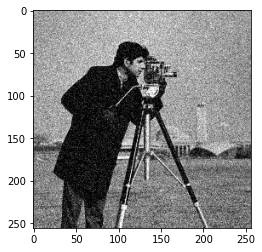

In [126]:
plt.imshow(img3, cmap="gray")